In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd

In [14]:
df = pd.read_csv('../data/cl_papers.csv', index_col=0)
df

,id,title,area,source,year,doi,abstract,semantic_scholar_id
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb
...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c


In [15]:
# EMNLP 2021 has '{' and '}' characters in the data
df.loc[(df['source'] == 'EMNLP') & (df['year'] == 2021), 'title'] = df.loc[(df['source'] == 'EMNLP') & (df['year'] == 2021), 'title'].str.replace('{', '', regex=False).str.replace('}', '', regex=False)
df.to_csv('../data/cl_papers.csv')

In [16]:
def is_interpretability(row):
    if row['year'] < 2020:
        # interpretability and analysis track started in 2020
        return None

    area = row['area'].lower()
    if 'interpretability' in area or 'analysis of language models' in area:
        return True
    
    return False

df['interpretability'] = df.apply(is_interpretability, axis=1)

In [18]:
df_with_interpretability = df[(df['interpretability'] == True) | (df['interpretability'] == False)]
df_with_interpretability

,id,title,area,source,year,doi,abstract,semantic_scholar_id,interpretability
0,main.1004,AnswerFact: Fact Checking in Product Question ...,Question Answering,EMNLP,2020,10.18653/v1/2020.emnlp-main.188,Product-related question answering platforms n...,4c61df1b4b9a164fec1a34587b4fffae029cd18c,False
1,main.1006,Knowledge-Grounded Dialogue Generation with Pr...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.272,We study knowledge-grounded dialogue generatio...,3447a432f724aa36595643446acda5b78943db19,False
2,main.1009,BiST: Bi-directional Spatio-Temporal Reasoning...,Dialog and Interactive Systems,EMNLP,2020,10.18653/v1/2020.emnlp-main.145,Video-grounded dialogues are very challenging ...,f4a2acfeb1705df3f430cc53ace26e1dbbbcbd16,False
3,main.1010,A Knowledge-Aware Sequence-to-Tree Network for...,NLP Applications,EMNLP,2020,10.18653/v1/2020.emnlp-main.579,With the advancements in natural language proc...,24ed85ad966823868c1694a19385d01c6ad71008,False
4,main.1011,Knowledge Association with Hyperbolic Knowledg...,Information Extraction,EMNLP,2020,10.18653/v1/2020.emnlp-main.460,Capturing associations for knowledge graphs (K...,3d61a28b9429fc8f7047fc379a0134a3765edbcb,False
...,...,...,...,...,...,...,...,...,...
9250,T4773,Rank-Aware Negative Training for Semi-Supervis...,Machine Learning for NLP,ACL,2023,10.1162/tacl_a_00574,Abstract Semi-supervised text classification-b...,79a502caa0b12573f56a7e8948459722aa891479,False
9251,T4777,Transparency Helps Reveal When Language Models...,"Linguistic Theories, Cognitive Modeling, and P...",ACL,2023,10.1162/tacl_a_00565,Many current NLP systems are built from langua...,eee70790ced38b0fcf50351dbb3dcbdb582467e8,False
9252,T4803,Design Choices for Crowdsourcing Implicit Disc...,Discourse and Pragmatics,ACL,2023,10.1162/tacl_a_00586,Abstract Disagreement in natural language anno...,bf65a1b637e0f253abb8402fc9d0ab80db79aa92,False
9253,T4929,Time-and-Space-Efficient Weighted Deduction,"Semantics: Sentence-level Semantics, Textual I...",ACL,2023,10.1162/tacl_a_00588,Abstract Many NLP algorithms have been describ...,f1803d124e5af7263ce656f7ccf3219eacc62b1c,False


# Computing embeddings

In [19]:
from transformers import AutoTokenizer
from adapters import AutoAdapterModel
from tqdm import tqdm
tqdm.pandas()

tokenizer = AutoTokenizer.from_pretrained('allenai/specter2_base')

model = AutoAdapterModel.from_pretrained("allenai/specter2_base")
adapter_name = model.load_adapter("allenai/specter2_classification", source="hf", set_active=True)

def get_embedding(paper_row):
    text = paper_row['title'] + tokenizer.sep_token + paper_row['abstract']
    inputs = tokenizer(text,
                       padding=True,
                       truncation=True,
                       return_tensors="pt",
                       return_token_type_ids=False,
                       max_length=2048)
    output = model(**inputs)
    embeddings = output.last_hidden_state[:, 0, :][0].detach().numpy()
    return embeddings

df_with_interpretability['embedding'] = df_with_interpretability.progress_apply(get_embedding, axis=1)

/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/Users/tom/miniconda3/envs/interpretability-impact/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6994/6994 [17:54<00:00,  6.51it/s]
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/1970831043.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_interpretability['embedding'] = df_with_interpretability.progress_apply(get_embedding, axis=1)


In [33]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch

SEED = 42
SPLIT = 0.2

X = np.stack(df_with_interpretability['embedding'].values)

y = df_with_interpretability['interpretability'].values
y = torch.tensor([1 if label else 0 for label in y], dtype=torch.long)

indices = np.arange(len(df_with_interpretability))
train_indices, test_indices = train_test_split(indices, test_size=SPLIT, random_state=SEED)

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

df_train, df_test = df_with_interpretability.iloc[train_indices], df_with_interpretability.iloc[test_indices]

In [82]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


# we are augmenting the test data with blackboxnlp papers
blackbox_df = pd.read_csv('../data/blackbox_papers.csv', index_col=0)

X_blackbox = np.stack(blackbox_df['embedding'].values) 
X_blackbox = torch.stack([torch.tensor(np.fromstring(x[1:-1], sep='\n'), dtype=torch.float32) for x in X_blackbox])
y_blackbox = blackbox_df['interpretability'].values
y_blackbox = torch.tensor([1 if label else 0 for label in y_blackbox], dtype=torch.long)
X_augmented_train = torch.cat((X_train, X_blackbox), dim=0)
y_augmented_train = torch.cat((y_train, y_blackbox), dim=0)


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/2530799469.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/2530799469.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_66219/2530799469.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
/var/f

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim


class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)


    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = torch.softmax(out, dim=-1)
        return out


In [84]:
HIDDEN_SIZE = 400 
BATCH_SIZE = 150
LR = 0.002
INPUT_SIZE = X_train.shape[1]

In [85]:
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import torch

train_dataset = TensorDataset(X_augmented_train, y_augmented_train)

class_sample_count = np.array([len(np.where(y_augmented_train == t)[0]) for t in np.unique(y_augmented_train)])
weight = 1. / class_sample_count
samples_weight = np.array([weight[t] for t in y_augmented_train])

samples_weight = torch.from_numpy(samples_weight)
samples_weight = samples_weight.double()
sampler = WeightedRandomSampler(samples_weight, len(samples_weight))

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.14it/s]


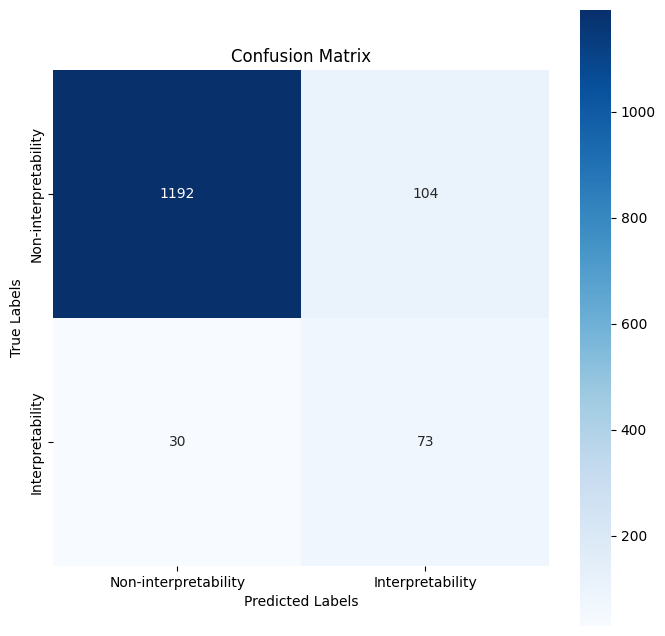

F1 Score: 0.5214285714285715


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

model = MLPClassifier(INPUT_SIZE, HIDDEN_SIZE, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.995)
EPOCHS = 50

for epoch in tqdm(range(EPOCHS)):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    scheduler.step()
    
y_pred = []
y_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.float(), labels.float()
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        y_pred.extend(predicted.numpy())
        y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [117]:
KEYWORDS = ['interpretability', 'interpretable', 'dimension', 'subspace', 'inner workings', 'circuit', 'probe', 'probing', 'counterfactual', 'attribution', 'subnetwork', 'intrinsic', 'explanation', 'factual', 'causal', 'role of ', 'why', 'encode', 'underlying', 'explainable', 'shortcut', 'encodings', 'adversarial', 'features', 'align', 'insight']
# Removed keywords (too many false positives): adversarial, representation, analysis, interpret, projection, interpretation, understand, space, mechanism, structure, understanding

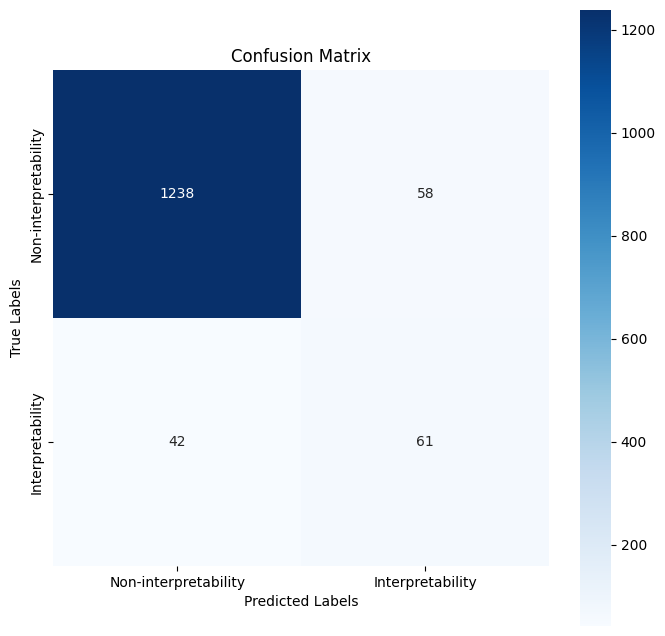

F1 Score: 0.5495495495495496


In [118]:
from sklearn.metrics import f1_score

y_pred = []
y_true = []


model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        pred = int(output[1] > 0.5)
        
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])

        y_pred.append(pred and has_keyword)
        y_true.append(row['interpretability'])
cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', square=True)
labels = ['Non-interpretability', 'Interpretability']
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_title('Confusion Matrix')
plt.show()
score = f1_score(y_true, y_pred, average='binary')
print("F1 Score:", score)

In [116]:
model.eval()
with torch.no_grad():
    for index, row in df_test.iterrows():
        vector = row['embedding']
        output = model(torch.tensor(vector))
        pred = torch.argmax(output)
        has_keyword = any([word in row['abstract'].lower() for word in KEYWORDS])

        
        if not (pred and has_keyword) and row['interpretability'] and pred:
            print(row['abstract'])
            print('keyword', has_keyword)
            print('pred', output[1])
            print('-' * 50)


Language Models (LMs) pre-trained with self-supervision on large text corpora have become the default starting point for developing models for various NLP tasks. Once the pre-training corpus has been assembled, all data samples in the corpus are treated with equal importance during LM pre-training. However, due to varying levels of relevance and quality of data, equal importance to all the data samples may not be the optimal choice. While data reweighting has been explored in the context of task-specific supervised learning and LM fine-tuning, model-driven reweighting for pre-training data has not been explored. We fill this important gap and propose PRESENCE, a method for jointly reweighting samples by leveraging self-influence (SI) scores as an indicator of sample importance and pre-training. PRESENCE promotes novelty and stability for model pre-training. Through extensive analysis spanning multiple model sizes, datasets, and tasks, we present PRESENCE as an important first step in t

In [119]:
torch.save(model.state_dict(), './classifier-weights.pt')